# Mesurer des paramètres météorologiques avec des  capteur Pression-Hygrométrie-Température#

Le but de cette activité est d'aborder la programmation d'un nano-ordinateur pilotant des capteurs météorologiques. Dans un premier temps on se concentre ici sur l'initialisation et l'acquision de mesures transmises par un capteur, dans un second temps on abordera la configuration des capteurs afin de servir des objectifs précis. L'outil présenté ici permet d'interagir DIRECTEMENT avec le nano-ordinateur depuis une interface web. Il ne s'agit pas d'une simulation mais d'une situation réelle concrète.
Les manipulations sont réalisées avec une série de 3 capteurs Adafruit BME280, MCP9808, MPL3115 connectés sue le bus [i2c]() d'une [Raspberry Pi3] fonctionnant avec une image Debian Stretch [fournie par l'IFÉ ENS de Lyon](), disposant des bibliothèques de programmes INTEL [mraa]() et [upm](). La bibliothèque [mraa]() fournit tous les programmes permettant l'interaction entre la Raspberry et le matériel de connection des capteurs, la bibliothèque [mraa]() fournit les pilotes (avec toutes les fonctions d'interaction) de nombreux capteurs du marché.

## Mesurer puis écrire la température en 6 lignes ##

Chaque ligne de texte ci-dessous est traduite dans le bloc suivant en une instruction dans un langage interprétable par la machine, à chaque alinéa correspond une instruction, la somme des instructions constitue un programme.

 * Demander l'utilisation des outils nécessaires, il sagit de deux bibliothèques de programmes de base qui permettent d'interagir et de piloter les capteurs que nous avons choisis. Le nom de ces bibliothèques est mraa et upm (l'instruction est _import_)
 * parmi tous les pilotes disponibles nous devons utiliser le pilote pyupm_bmp280 (py pour python, upm nom de la librairie, _ séparateur, bme280 nom du capteur)
 * Déclarer le nom du capteur qu'on va utiliser (on a choisi de l'appeler bme)
 * Mettre à jour le capteur (on utilise la commande préprogrammée dans le pilote "update"), cette opération est nécessaire pour que le capteur puisse faire une nouvelle mesure, sinon le capteur renverra la mesure stockée en mémoire.
 * Mesurer la température (on utilise la fonction préprogrammée dans le pilote "getTemperature()" on a choisi ici d'appeler la température tempBME)
 * Imprimer la température

In [6]:
import mraa, upm
from upm import pyupm_bmp280 as bme280

Le capteur BME280 peut avoir deux adresses suivant les modèles d'implémentation `0x77` ou `0x76`. Si la valeur n'est pas correcte le capteur ne s'initialise pas.

In [ ]:
addr = 0x77

In [7]:
addr = 0x76

In [8]:
bme = bme280.BME280(0,addr)
bme.update()
tempBME = bme.getTemperature()
print ("{0:.2f} °C".format(tempBME))

28.40 °C


## ÉCRIRE LE PROGRAMME POUR LE CAPTEUR mcp9808 

Dans le bloc suivant, en vous inspirant du bloc précédent, écrivez le programme qui permet d'obtenir la température à l'aide d'un autre capteur installé sur le même nano-ordinateur. Les éléments suivants fournissent les paramètres nécessaires :
 * Nom du capteur mcp9808 (au lieu de bmp280)
 * nom du pilote  pyupm_mcp9808 (au lieu de pyupm_bmp280)
 * identifiant du capteur MCP9808 (au lieu de BME280)
 * instruction pour obtenir la température getTemp() (au lieu de getTemperature())
 * La commande de mise à jour du capteur est inutile sur ce capteur
 
La coloration des mots s'effectue automatiquement, les erreurs d'écriture apparaissent en rouge.

In [3]:
import mraa, upm


## Nommer une _constante_ puis utiliser toutes les capacités du capteur ##

Il est utile et efficace de nommer les constantes et les variables qu'on utilise dans un programme. Ici par exemple quand on déclare le capteur bme on utilise le nombre "0" dont il est difficile de connaître l'origine et l'usage. Il s'agit  du numéro du "bus" sur lequel est connecté notre capteur, il peut y avoir dans ceratins cas plusieurs "bus" sur lesquels sont connectés plusieurs capteurs on exprime sur la seconde ligne que le premier bus porte le numéro 0 et sera utilisé pour trouver le capteur bme; bus1 est une _constante_ qui vaut 0.
Dans le code précédent tempBME est une _variable_ qui prend la valeur fournie par le capteur BME280 qui mesure la température. Ce capteur est capable de mesurer d'autres grandeurs physiques **variables** : la pression et le pourcentage d'hygrométrie. On peut donc utiliser 3 _variables_ tempBME pour la température, pressBME pour la pression et hygroBME pour l'hygrométrie. On peut choisir le nom que l'on veut pour les variables mais il est d'usage de choisir des noms qui donnent des indications sur leur contenu.
On utilise 3 fonctions préprogrammées fournies par le pilote que nous avons choisi.
L'instruction d'impression a été augmentée pour afficher les 3 mesures effectuées.

In [9]:
import mraa, upm
from upm import pyupm_bmp280  as bmp280
bus1 = 0
bme = bmp280.BME280(bus1,addr)
bme.update()
tempBME = bme.getTemperature()
pressBME = bme.getPressure() / 100.0
hygroBME = bme.getHumidity()
print ("{0:.2f} %\t\t{1:.2f} °C\t{2:.2f} hPa".format(hygroBME,tempBME,pressBME))

23.18 %		28.36 °C	1008.56 hPa


## Imprimer un commentaire (le nom des variables mesurées) ##

M€me si les unités affichées sont une indication sur la grandeur mesurée, il est souhaitable d'indiquer quelle est cette grandeur soit en en-tête des colonnes d'un tableau, soit dans la légende d'un graphique.

In [10]:
import mraa, upm
from upm import pyupm_bmp280  as bmp280
bus1 = 0
bme = bmp280.BME280(bus1,addr)
bme.update()
tempBME = bme.getTemperature()
pressBME = bme.getPressure() / 100.0
hygroBME = bme.getHumidity()
print ('Humidité : \tTempérature : \tPression :')
print ("{0:.2f} %\t\t{1:.2f} °C\t{2:.2f} hPa".format(hygroBME,tempBME,pressBME))

Humidité : 	Température : 	Pression :
23.24 %		28.38 °C	1008.55 hPa


## Ajouter une fonction pour calculer la pression au niveau de la mer ##

La pression atmosphérique en un lieu dépend de son altitude. Pour pouvoir faire de la météorologie ou simplement comparer des mesures faites en différents endroits il faut partager une référence commune et le niveau de la mer est une solution simple et efficace. On convertit donc  notre mesure locale à la valeur qu'elle aurait  si nous étions au niveau de la mer. Il nous faut donc connaître notre altitude et importer des outils mathématiques. pour cela on ajoute la constante localAlt au programme et on importe la bibliothèque d'outils mathématiques de python.
Il est probable que nous ayons à réutiliser ce calcul  dans d'autres programmes et il serait malin de pouvoir réutiliser simplement les lignes de code que nous allons écrire. Plutôt que les noyer dans le programme nous allons _définir une fonction_ qui prendra un _paramètre_ (la pression mesurée m_Pressure) et qui nous _retournera_ la valeur à laquelle cette mesure correspond au niveau de la mer (sl_Pressure pour sea-level pressure). Le paramètre est une variable tout comme la valeur retournée.
La fonction est appelée ici convertSeaLevel() elle prend comme paramètre la variable mesurée par le capteur pressBME et fournit la variable décrivant  la pression au niveau de la mer seaLevelPress. On voit que les variables _locales_ utilisées par la fonction (m_Pressure, sl_Pressure) n'ont pas forcément le même nom que les variables _globales_ du programme principal (pressBME, seaLevelPress), cela permet de manipuler des noms de variables signifiants et cohérents avec leur contexte. Vous noterez que pouur souligner cette différence le nom des variables _locales à la fonction_ utilisent un système de séparation des mots (des "\_") différent de celui du programme principal ( le CamelCase).

In [11]:
import mraa, upm
from upm import pyupm_bmp280 as bmp280
import math
bus1 = 0
bme = bmp280.BME280(bus1,addr)
localAlt = 156.5
# Calcul de la pression au niveau de la mer
def convertSeaLevel (m_Pressure):
	s_Pressure = m_Pressure / math.pow(1.0 - localAlt/44330, 5.255)
	return s_Pressure
# fin du calcul
bme.update()
tempBME = bme.getTemperature()
pressBME = bme.getPressure() / 100.0
hygroBME = bme.getHumidity()
seaLevelPress = convertSeaLevel (pressBME)
print ('Humidité : \tTempérature : \tPression : \tPression(mer) : ')
print ("{0:.2f} %\t\t{1:.2f} °C\t{2:.2f} hPa\t{3:.2f} hPa".format(hygroBME,tempBME,pressBME,seaLevelPress))

Humidité : 	Température : 	Pression : 	Pression(mer) : 
23.22 %		28.38 °C	1008.54 hPa	1027.46 hPa


## Écriture des données dans un fichier

Création ouverture d'un fichier et écriture des données.


In [5]:
import mraa, upm, math
from upm import pyupm_bmp280 as bmp280
bus1 = 0
dataFile = open('meteo.dat', 'a')
bme = bmp280.BME280(bus1,addr)
localAlt = 156.5
#
# Calcul de la pression au niveau de la mer
def convertSeaLevel (m_Pressure):
	s_Pressure = m_Pressure / math.pow(1.0 - localAlt/44330, 5.255)
	return s_Pressure
# fin du calcul
#
bme.update()
tempBME = bme.getTemperature()
pressBME = bme.getPressure() / 100.0
hygroBME = bme.getHumidity()
seaLevelPress = convertSeaLevel (pressBME)
print ('Humidité : \tTempérature : \tPression : \tPression(mer) : ')
s = "{0:.2f} %\t\t{1:.2f} °C\t{2:.2f} hPa\t{3:.2f} hPa".format(hygroBME,tempBME,pressBME,seaLevelPress)
print (s)
dataFile.write(s)
dataFile.close()

Humidité : 	Température : 	Pression : 	Pression(mer) : 
42.42 %		23.29 °C	994.84 hPa	1013.51 hPa


## Faire une mesure toutes les 5 secondes ##

Lorsque l'on dispose d'un capteur et d'une alimentation suffisante il est bien sûr extrêmement intéressant de faire des mesures **en continu**. En fait on ne peut pas réellement mesurer de façon continue, on effectue des mesures les unes à la suite des autres en ménageant un temps (qui peut êetre très court) entre deux mesures pour transmettre le résultat et permettre au capteur d'être prêt pour la mesure suivante. La valeur du temps de pause est ici de 5 secondes valeur fournie à la fonction sleep (dors pendant....) de la librairie des programmes de gestion du temps (qui est incluse au début du programme).
Nous avons vu précédemment comment faire **une** mesure, nous venons de voir comment _ne rien faire_ pendant un temps donné, il nous faut donc enchaîner Mesure->Repos->Mesure->Repos-> c'est ce que l'on appelle une _boucle_. Pour le moment nous ne nous préoccupons pas de savoir comment arrêter les mesures et nous nous lançons dans une _boucle sans fin_; pour cela nous utilisons un _mot réservé_ : "True" (qui veut dire vrai) et nous utilisons l'instruction  "Tant que c'est vrai mesure puis attends 5s et recommence" comme nous déclarons que c'est vrai et que nous ne touchons pas cette valeur cela reste toujours vrai et on recommence toujours la série "mesure puis attends 5s". La _condition_ ayant pour valeur _"Tant que"_ que nous avons utilisée se traduit par _while_ et tout ce qui suit les ":" et est décalé de 4 caractères est répété à l'infini dans l'ordre des lignes.

Humidité : 	Température : 	Pression : 	Pression(mer) : 
34.49 %		25.06 °C	1000.66 hPa	1019.43 hPa
34.36 %		25.06 °C	1000.64 hPa	1019.41 hPa
34.43 %		25.06 °C	1000.62 hPa	1019.39 hPa
34.43 %		25.06 °C	1000.65 hPa	1019.42 hPa
34.43 %		25.06 °C	1000.66 hPa	1019.43 hPa
34.42 %		25.06 °C	1000.67 hPa	1019.44 hPa
34.42 %		25.06 °C	1000.66 hPa	1019.44 hPa
34.43 %		25.06 °C	1000.66 hPa	1019.43 hPa
34.44 %		25.06 °C	1000.66 hPa	1019.43 hPa
34.42 %		25.07 °C	1000.69 hPa	1019.46 hPa
34.40 %		25.07 °C	1000.68 hPa	1019.45 hPa
34.39 %		25.07 °C	1000.66 hPa	1019.44 hPa
34.41 %		25.07 °C	1000.68 hPa	1019.45 hPa
34.41 %		25.07 °C	1000.68 hPa	1019.45 hPa
34.41 %		25.07 °C	1000.68 hPa	1019.45 hPa
34.43 %		25.08 °C	1000.67 hPa	1019.44 hPa
34.47 %		25.08 °C	1000.67 hPa	1019.44 hPa
34.52 %		25.08 °C	1000.67 hPa	1019.44 hPa
34.53 %		25.08 °C	1000.66 hPa	1019.43 hPa
34.50 %		25.08 °C	1000.65 hPa	1019.42 hPa
34.47 %		25.09 °C	1000.66 hPa	1019.43 hPa
34.45 %		25.09 °C	1000.67 hPa	1019.44 hPa
34.42 %		25.09 °C	10

<IPython.core.display.Javascript object>


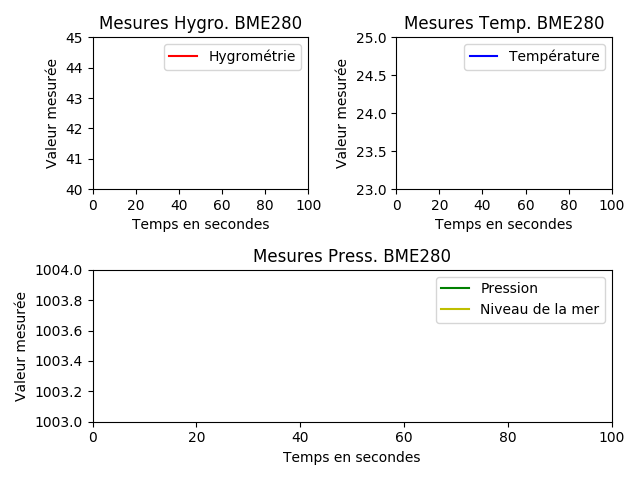

In [3]:
%matplotlib notebook

import mraa, upm, math, time
from upm import pyupm_bmp280 as bmp280

from matplotlib import pyplot as plt
import numpy as np


bus1 = 0
pauseVal = 2
bme = bmp280.BME280(bus1,addr)
localAlt = 156.5
x = []; y1 = []; y2 = [] ; y3 = []; y4 = []

# Calcul de la pression au niveau de la mer
def convertSeaLevel (m_Pressure):
	s_Pressure = m_Pressure / math.pow(1.0 - localAlt/44330, 5.255)
	return s_Pressure
# fin du calcul
print ('Humidité : \tTempérature : \tPression : \tPression(mer) : ')
#while True :
for num in range(0,50):
    mestime = num * 2.0
    bme.update()
    tempBME = bme.getTemperature()
    pressBME = bme.getPressure() / 100.0
    hygroBME = bme.getHumidity()
    seaLevelPress = convertSeaLevel (pressBME)
    s = "{0:.2f} %\t\t{1:.2f} °C\t{2:.2f} hPa\t{3:.2f} hPa".format(hygroBME,tempBME,pressBME,seaLevelPress)
    ss = "{0:.2f} {1:.2f} {2:.2f} {3:.2f} {4:.2f} \n".format(mestime,hygroBME,tempBME,pressBME,seaLevelPress)
    print (s)
    time.sleep (pauseVal)

    x.append(float(mestime))
    y1.append(float(hygroBME))
    y2.append(float(tempBME))
    y3.append(float(pressBME))
    y4.append(float(seaLevelPress))

fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.set_title("Mesures Hygro. BME280")    
ax1.set_xlabel('Temps en secondes')
ax1.set_ylabel('Valeur mesurée')
ax1.set_xlim([0.0, 100.0])
ax1.set_ylim([40.0, 45.0])

ax1.plot(x,y1, c='r', label='Hygrométrie')

ax2.set_title("Mesures Temp. BME280")    
ax2.set_xlabel('Temps en secondes')
ax2.set_ylabel('Valeur mesurée')
ax2.set_xlim([0.0, 100.0])
ax2.set_ylim([23.0, 25.0])

ax2.plot(x,y2, c='b', label='Température')

ax3.set_title("Mesures Press. BME280")    
ax3.set_xlabel('Temps en secondes')
ax3.set_ylabel('Valeur mesurée')

ax3.plot(x,y3, c='g', label='Pression')
ax3.plot(x,y4, c='y', label='Niveau de la mer')
ax3.set_xlim([0.0, 100.0])
ax3.set_ylim([1003.0, 1004.0])


leg1 = ax1.legend()
leg2 = ax2.legend()
leg3 = ax3.legend()

plt.tight_layout()
plt.show()


## Dessin dynamique des 3 paramètres mesurés
Ce programme affiche en temps réel dans un graphique la température la pression et l'hygrométrie. Il est composé de 6 blocs qui permettent d'aborder indépendamment chacune des étapes du programme.
### première étape : importations de l'environnement et des bibliothèques
Ce bloc déclare un environnement graphique utilisant `Matplotlib` et faisant appel aux librairies :
 * matplotlib
 * numpy
 * mraa
 * upm
 * math
 * time

In [12]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

import mraa, upm, math, time
from upm import pyupm_bmp280 as bmp280

### Seconde étape : déclaration des variables et des constantes
On déclare ici le bus utilisé, l'intervalle de mesure, le nom du capteur utilisé, l'altitude locale et les 4 tableaux qui vont accueillir les mesures.

In [14]:
bus1 = 0
pauseVal = 0.2
bme = bmp280.BME280(bus1,addr)
localAlt = 156.5
x = []; y1 = []; y2 = [] ; y3 = []; y4 = []

### Troisième étape : Création de la figure dans laquelle seront affichées les données
Ce bloc met en place une figure avec 3 graphiques, 2 sur la première ligne un sur la seconde. Chacun a un titre un nom pour les axes et une légende. La figure sera affichée sous ce bloc.

<IPython.core.display.Javascript object>


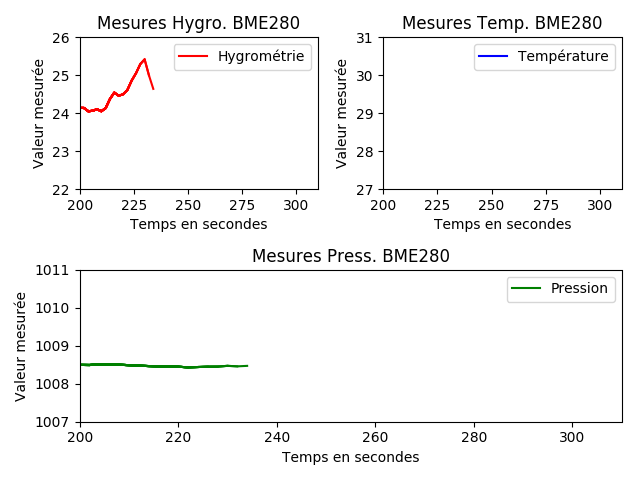

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.set_title("Mesures Hygro. BME280")    
ax1.set_xlabel('Temps en secondes')
ax1.set_ylabel('Valeur mesurée')

ax2.set_title("Mesures Temp. BME280")    
ax2.set_xlabel('Temps en secondes')
ax2.set_ylabel('Valeur mesurée')

ax3.set_title("Mesures Press. BME280")    
ax3.set_xlabel('Temps en secondes')
ax3.set_ylabel('Valeur mesurée')

ax1.plot(x,y1, c='r', label='Hygrométrie')
ax2.plot(x,y2, c='b', label='Température')
ax3.plot(x,y3, c='g', label='Pression')

ax1.legend()
ax2.legend()
ax3.legend()

### Quatrième étape : recherche rapide de la valeur moyenne et centrage de l'affichage
On effectue 10 mesures pour déterminer la valeur moyenne  de la pression température et hygrométrie qui servent à fixer la hauteur d'affichage, l'amplitude est choisie à la main et introduite ici

In [16]:
tmoy = 0.
pmoy = 0.
hmoy = 0.
for i in range(10):
    bme.update()
    tempBME = bme.getTemperature()
    pressBME = bme.getPressure() / 100.0
    hygroBME = bme.getHumidity()
    time.sleep (pauseVal)
    tmoy += tempBME
    pmoy += pressBME
    hmoy += hygroBME
tmoy /= 10.
pmoy /= 10.
hmoy /= 10.
tmoy = math.floor(tmoy)
pmoy = math.floor(pmoy)
hmoy = math.floor(hmoy)

### Cinquième étape dessin de la figure
On dessine ici la figure en prenant en compte les paramètres définis dans le bloc précédent

In [17]:
plt.tight_layout()
fig.canvas.draw()

### Sixième étape mesure et tracé  des mesures sur figure en temps réel
le tracé s'effectue dans la figure dessinée ci-dessus.

In [ ]:
ax1.set_ylim([(hmoy - 1.0), (hmoy + 3.0)])
ax2.set_ylim([(tmoy - 1.0),(tmoy + 3.0)])
ax3.set_ylim([(pmoy - 1.0), (pmoy + 3.0)])
for jump in range(0,5) :
    lim1 = -10.0 + jump * 100.0
    lim2 = 100.0 + jump * 100.0
    ax1.set_xlim([lim1,lim2])
    ax2.set_xlim([lim1,lim2])
    ax3.set_xlim([lim1,lim2])
    plt.tight_layout()
    fig.canvas.draw()
    start = jump * 50
    stop = (jump + 1)*50
    for num in range(start,stop):
        mestime = num * 2.0
        bme.update()
        tempBME = bme.getTemperature()
        pressBME = bme.getPressure() / 100.0
        hygroBME = bme.getHumidity()
        time.sleep (pauseVal)
   
        x.append(float(mestime))
        y1.append(float(hygroBME))
        y2.append(float(tempBME))
        y3.append(float(pressBME))
        ax1.plot(x,y1, c='r', label='Hygrométrie')
        ax2.plot(x,y2, c='b', label='Température')
        ax3.plot(x,y3, c='g', label='Pression')    
        fig.canvas.draw()

### Code complet par fusion des blocs

<IPython.core.display.Javascript object>


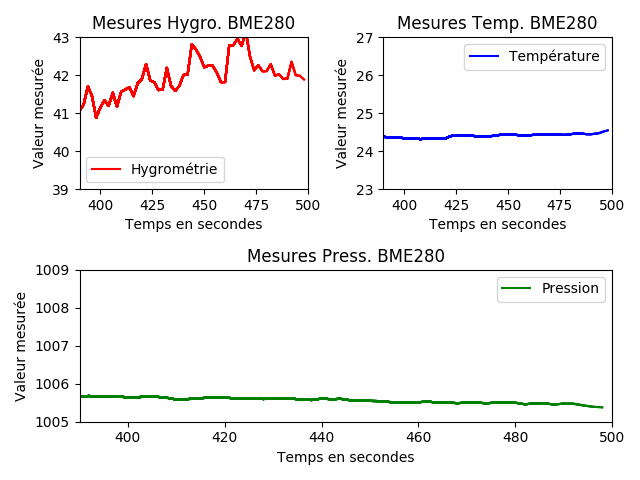

In [3]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

import mraa, upm, math, time
from upm import pyupm_bmp280 as bmp280
bus1 = 0
# Adresse à vérifier 0x76 ou 0X77 selon les modèles
addr = 0x77
pauseVal = 0.5
bme = bmp280.BME280(bus1,addr)
localAlt = 156.5
x = []; y1 = []; y2 = [] ; y3 = []; y4 = []
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.set_title("Mesures Hygro. BME280")    
ax1.set_xlabel('Temps en secondes')
ax1.set_ylabel('Valeur mesurée')

ax2.set_title("Mesures Temp. BME280")    
ax2.set_xlabel('Temps en secondes')
ax2.set_ylabel('Valeur mesurée')

ax3.set_title("Mesures Press. BME280")    
ax3.set_xlabel('Temps en secondes')
ax3.set_ylabel('Valeur mesurée')

ax1.plot(x,y1, c='r', label='Hygrométrie')
ax2.plot(x,y2, c='b', label='Température')
ax3.plot(x,y3, c='g', label='Pression')

ax1.legend()
ax2.legend()
ax3.legend()
tmoy = 0.
pmoy = 0.
hmoy = 0.
for i in range(10):
    bme.update()
    tempBME = bme.getTemperature()
    pressBME = bme.getPressure() / 100.0
    hygroBME = bme.getHumidity()
    time.sleep (pauseVal)
    tmoy += tempBME
    pmoy += pressBME
    hmoy += hygroBME
tmoy /= 10.
pmoy /= 10.
hmoy /= 10.
tmoy = math.floor(tmoy)
pmoy = math.floor(pmoy)
hmoy = math.floor(hmoy)
ax1.set_ylim([(hmoy - 1.0), (hmoy + 3.0)])
ax2.set_ylim([(tmoy - 1.0),(tmoy + 3.0)])
ax3.set_ylim([(pmoy - 1.0), (pmoy + 3.0)])
for jump in range(0,5) :
    lim1 = -10.0 + jump * 100.0
    lim2 = 100.0 + jump * 100.0
    ax1.set_xlim([lim1,lim2])
    ax2.set_xlim([lim1,lim2])
    ax3.set_xlim([lim1,lim2])
    plt.tight_layout()
    fig.canvas.draw()
    start = jump * 50
    stop = (jump + 1)*50
    for num in range(start,stop):
        mestime = num * 2.0
        bme.update()
        tempBME = bme.getTemperature()
        pressBME = bme.getPressure() / 100.0
        hygroBME = bme.getHumidity()
        time.sleep (pauseVal)
   
        x.append(float(mestime))
        y1.append(float(hygroBME))
        y2.append(float(tempBME))
        y3.append(float(pressBME))
        ax1.plot(x,y1, c='r', label='Hygrométrie')
        ax2.plot(x,y2, c='b', label='Température')
        ax3.plot(x,y3, c='g', label='Pression')    